In [1]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import matplotlib.pyplot as plt
import time
import random
import math
from PIL import Image
from keras.models import load_model

In [2]:
train_images = pickle.load(open("data/full_CNN_train.p", "rb" ))
labels = pickle.load(open("data/full_CNN_labels.p", "rb" ))

In [3]:
print("dataset",type(train_images))
print(type(labels))

train_images = np.array(train_images)
labels = np.array(labels)
print(train_images.shape)
print(labels.shape)

dataset <class 'list'>
<class 'list'>
(12764, 80, 160, 3)
(12764, 80, 160, 1)


In [4]:
# new_shape = (224,224)

# resized_images = []
# for i in range(train_images.shape[0]):
#     image = Image.fromarray(np.uint8(train_images[i]))
#     image = image.resize(new_shape)
#     resized_images.append(np.array(image))

# train_images = np.array(resized_images)


# print(train_images.shape) # (12764, 224, 224, 3)

# new_shape = (224,224)

# resized_images = []
# for i in range(labels.shape[0]):
#     image = Image.fromarray(np.uint8(labels[i][:,:,0]))
#     image = image.resize(new_shape, resample=Image.NEAREST)
#     resized_images.append(np.expand_dims(np.array(image), axis=-1))

# labels = np.array(resized_images)
# print(labels.shape) # (12764, 224, 224, 1)

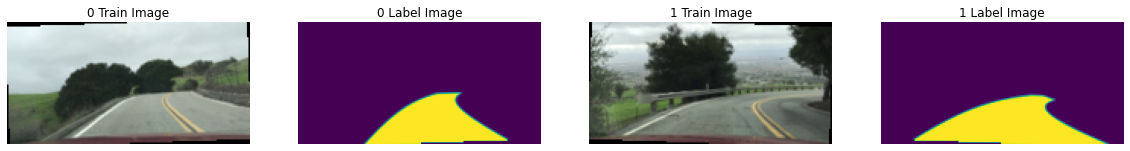

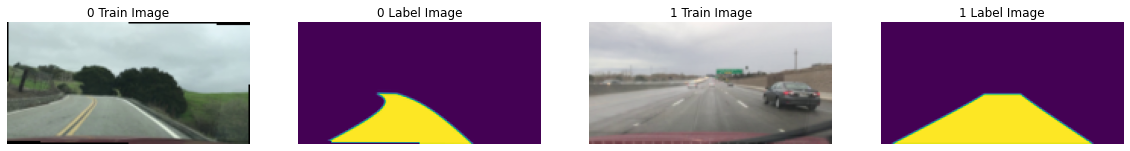

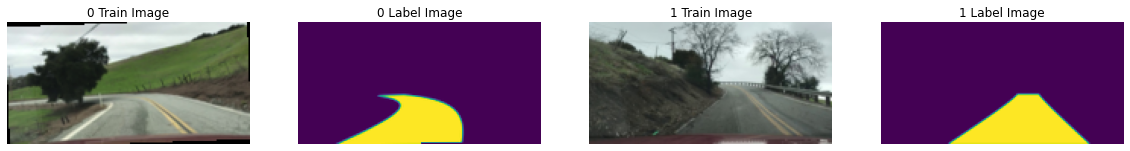

In [5]:
n = 2
indices = random.sample(range(len(train_images)), n)

# Plot each image and label
fig, axs = plt.subplots(1, 2 * n, figsize=(20, 5))
for i, index in enumerate(indices):
    axs[2 * i].imshow(train_images[index])
    axs[2 * i].set_title(f'{i} Train Image')
    axs[2 * i].axis('off')
    
    axs[2 * i + 1].imshow(labels[index])
    axs[2 * i + 1].set_title(f'{i} Label Image')
    axs[2 * i + 1].axis('off')

plt.show()

n = 2
indices = random.sample(range(len(train_images)), n)

# Plot each image and label
fig, axs = plt.subplots(1, 2 * n, figsize=(20, 5))
for i, index in enumerate(indices):
    axs[2 * i].imshow(train_images[index])
    axs[2 * i].set_title(f'{i} Train Image')
    axs[2 * i].axis('off')
    
    axs[2 * i + 1].imshow(labels[index])
    axs[2 * i + 1].set_title(f'{i} Label Image')
    axs[2 * i + 1].axis('off')

plt.show()

n = 2
indices = random.sample(range(len(train_images)), n)

# Plot each image and label
fig, axs = plt.subplots(1, 2 * n, figsize=(20, 5))
for i, index in enumerate(indices):
    axs[2 * i].imshow(train_images[index])
    axs[2 * i].set_title(f'{i} Train Image')
    axs[2 * i].axis('off')
    
    axs[2 * i + 1].imshow(labels[index])
    axs[2 * i + 1].set_title(f'{i} Label Image')
    axs[2 * i + 1].axis('off')

plt.show()

# Model Train

In [6]:
labels = labels / 255

In [7]:
train_images, labels = shuffle(train_images, labels)
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.3)

In [8]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape

((8934, 80, 160, 3),
 (8934, 80, 160, 1),
 (3830, 80, 160, 3),
 (3830, 80, 160, 1))

In [9]:
def create_model(input_shape):
    
    model = Sequential()
    
    model.add(BatchNormalization(input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Upsample 1
    model.add(UpSampling2D(size=(2,2)))
    # Deconvolutional layers
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))
    # Upsample 2
    model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))
    # Upsample 3
    model.add(UpSampling2D(size=(2,2)))
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final layer - only including one channel so 1 filter
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model

In [10]:
input_shape = X_train.shape[1:]

model = create_model(input_shape)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 80, 160, 3)       12        
 ormalization)                                                   
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 78, 16)       0         
 )                                                               
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

In [11]:
# Using a generator to help the model use less data
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)


# Compiling and training the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

start_time = time.time()

history=model.fit(datagen.flow(X_train, y_train, batch_size=128), steps_per_epoch=len(X_train)/128,
epochs=1, verbose=1,validation_data=(X_val,y_val))

# Measure the end time
end_time = time.time()

69/69 [==============================] - 765s 11s/step - loss: 0.0666 - accuracy: 0.8902 - val_loss: 0.0311 - val_accuracy: 0.9348


In [12]:
# Calculate the time taken
time_taken = end_time - start_time
print("Time taken to run the model: ", time_taken, "seconds")

Time taken to run the model:  766.4248683452606 seconds


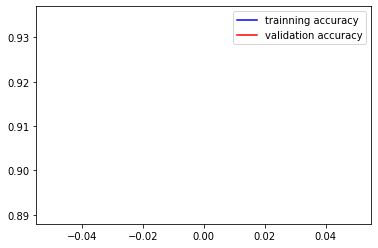

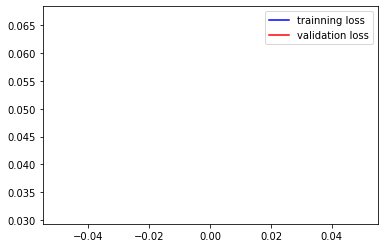

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [14]:
evaluation=model.evaluate(X_val,y_val)
print(evaluation)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

120/120 [==============================] - 69s 576ms/step - loss: 0.0311 - accuracy: 0.9348
[0.03110247105360031, 0.9347590804100037]
Test Accuracy : 93.48%


## Performance Calculation

In [15]:
prediction = model.predict(X_val)

In [16]:
def false_positive_negative(prediction, ground_truth):
    false_positive = 0
    false_negative = 0
    for i in range(prediction.shape[0]):
        for j in range(prediction.shape[1]):
            if prediction[i][j] == 255 and ground_truth[i][j] == 0:
                false_positive += 1
            elif prediction[i][j] == 0 and ground_truth[i][j] == 255:
                false_negative += 1
    return false_positive, false_negative

In [17]:
false_pos, false_neg = false_positive_negative(prediction.argmax(axis=0),y_val.argmax(axis=0))

In [18]:
print("Total FP : ",false_pos," Total Percentage: ",np.round((false_pos/prediction.shape[0])*100,2))
print("Total FN : ",false_neg," Total Percentage: ",np.round((false_neg/prediction.shape[0])*100,2))

Total FP :  0  Total Percentage:  0.0
Total FN :  0  Total Percentage:  0.0


In [19]:
precision = 100 * (1 - false_pos / (false_pos + 100 - false_neg))
recall = 100 * (1 - false_neg / (false_neg + 100 - false_pos))
print("F1_Score: ",2 * (precision * recall) / (precision + recall))

F1_Score:  100.0


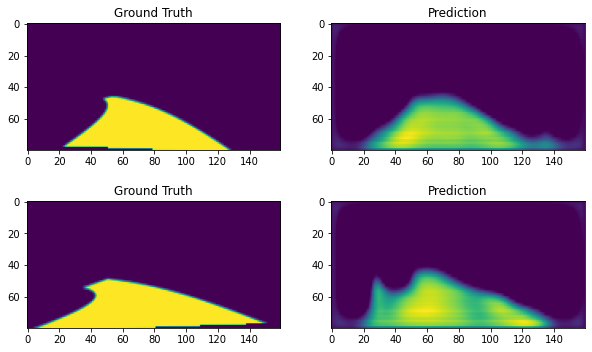

In [28]:
# Plot some random images from y_val
num_images = 2
random_indices = np.random.randint(0, y_val.shape[0], size=num_images)
y_val_images = y_val[random_indices]

# Get the corresponding predictions
predictions = model.predict(X_val[random_indices])

fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images*3))
for i in range(num_images):
    axes[i, 0].imshow(y_val_images[i])
    axes[i, 0].set_title('Ground Truth')
    axes[i, 1].imshow(predictions[i])
    axes[i, 1].set_title('Prediction')
plt.show()

## Complexity

In [23]:
# Get the number of parameters
num_params = model.count_params()

# Print the number of parameters
print("Number of parameters:", num_params)

# Calculate the memory requirement in bytes
memory_requirement = num_params * 4

# Print the memory requirement in bytes
print("Size:", memory_requirement, "bytes")


Number of parameters: 181693
Size: 726772 bytes


In [ ]:
# model.save('full_CNN_model.h5')